# Sale of apartments in Modi'in

## Dataset of sale apartments in the second half of 2020, Modi'in Israel

In [3]:
# import libraries
import sklearn
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt # plotting
import seaborn as sns
import numpy as np # linear algebra
import pandas as pd

In [4]:
print(np.__version__)
print(sns.__version__)
print(pd.__version__)
import sys
print(sys.version)
print(sklearn.__version__)

1.21.5
0.11.2
1.4.1
3.10.0 | packaged by conda-forge | (default, Nov 10 2021, 13:20:59) [MSC v.1916 64 bit (AMD64)]
1.0.2


In [5]:
df = pd.read_csv(r'C:\Users\abedw\DataBases\modiin_2020.csv')

In [6]:
df.head()

,ID,DATE,PRICE,PRICE_VALUE,TYPE,PART_SOLD,CITY,YEAR_building,sq_meter,ROOMS
0,005956-0091-005-18,01/06/2020,2330000,2330000,Apartment in a building,1.0,modiin,2022,121,5.0
1,080073-0011-000-00,10/06/2020,1389146,1389146,Apartment in a building,1.0,modiin,2020,108,4.0
2,080072-0026-000-00,15/06/2020,2114064,2114064,Apartment in a building,1.0,modiin,2020,104,4.0
3,005569-0036-052-00,01/06/2020,2020000,20000000,Apartment in a building,1.0,modiin,1997,100,3.0
4,080073-0029-002-00,01/06/2020,2152682,2152682,Apartment in a building,1.0,modiin,2020,128,5.0


In [7]:
df.shape

(1451, 10)

In [8]:
df.describe()

,PRICE,PRICE_VALUE,PART_SOLD,YEAR_building,sq_meter,ROOMS
count,1.451000e+03,1.451000e+03,1451.000000,1451.000000,1451.000000,1451.000000
mean,1.750642e+06,1.763033e+06,0.947851,1883.753963,105.990351,3.862164
std,7.052201e+05,8.525338e+05,0.179198,498.833165,38.577337,1.345858
min,1.750000e+04,1.750000e+04,0.010000,0.000000,0.000000,0.000000
25%,1.261812e+06,1.261812e+06,1.000000,2009.000000,83.000000,3.000000
50%,1.628392e+06,1.628392e+06,1.000000,2020.000000,109.000000,4.000000
75%,2.125000e+06,2.125547e+06,1.000000,2020.000000,127.000000,5.000000
max,4.300000e+06,2.000000e+07,1.000000,2023.000000,261.000000,8.000000


In [9]:
df.dtypes

ID                object
DATE              object
PRICE              int64
PRICE_VALUE        int64
TYPE              object
PART_SOLD        float64
CITY              object
YEAR_building      int64
sq_meter           int64
ROOMS            float64
dtype: object

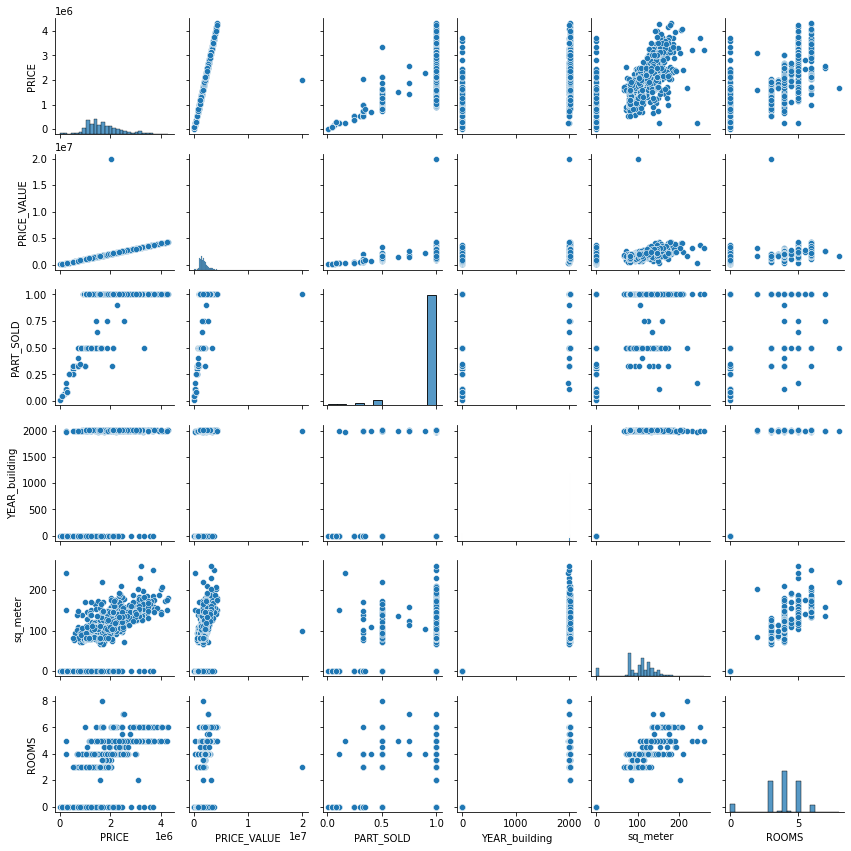

In [10]:
sns.pairplot(df, height=2)

In [11]:
pd.options.display.float_format = '{:,.2f}'.format

In [13]:
df.corr()

,PRICE,PRICE_VALUE,PART_SOLD,YEAR_building,sq_meter,ROOMS
PRICE,1.00,0.83,0.41,0.26,0.64,0.58
PRICE_VALUE,0.83,1.00,0.34,0.22,0.53,0.47
PART_SOLD,0.41,0.34,1.00,0.68,0.46,0.51
YEAR_building,0.26,0.22,0.68,1.00,0.73,0.76
sq_meter,0.64,0.53,0.46,0.73,1.00,0.92
ROOMS,0.58,0.47,0.51,0.76,0.92,1.00


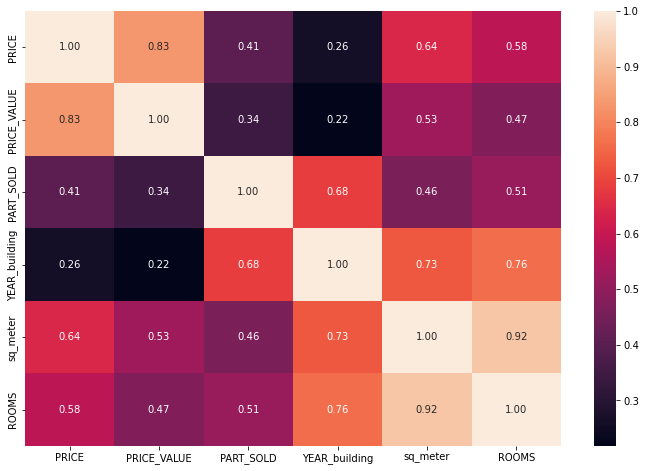

In [15]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(), annot=True, fmt='.2f')
plt.show()

In [43]:
X = df['PRICE'].values.reshape(-1,1)

In [73]:
y = df['ROOMS'].values

In [74]:
from sklearn.model_selection import train_test_split

In [75]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=0)

In [76]:
from sklearn.linear_model import LinearRegression

In [77]:
model = LinearRegression()

In [78]:
model.fit(X_train,y_train)

LinearRegression()

In [79]:
model.coef_

array([1.13899851e-06])

In [80]:
model.intercept_

1.8579218479078836

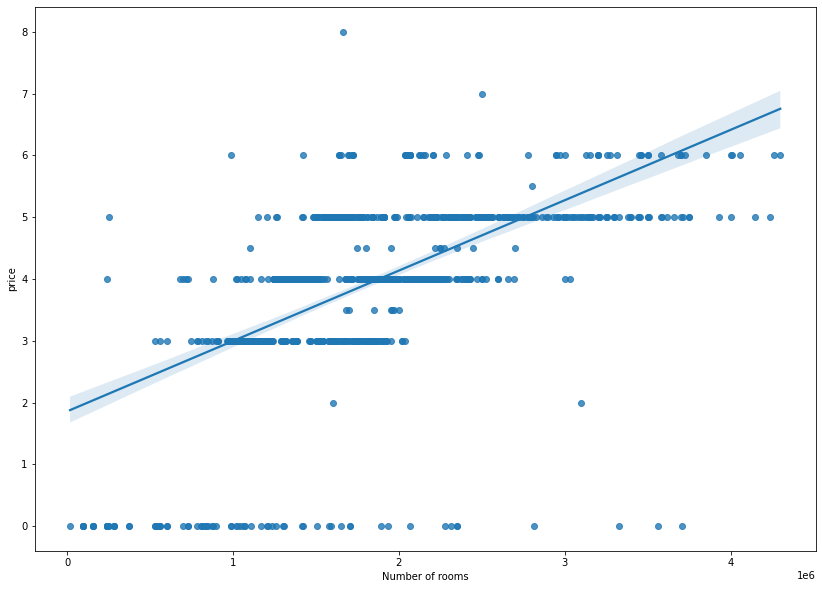

In [81]:
plt.figure(figsize=(14,10))
sns.regplot(x=X_train,y=y_train)
plt.xlabel('Number of rooms')
plt.ylabel('price')
plt.show()

In [82]:
# linear model here isn't very helpful i think random forest would be better option in this scenario

In [83]:
from sklearn.metrics import r2_score

In [84]:
y_train_pred= model.predict(X_train)

In [85]:
y_test_pred= model.predict(X_test)

In [86]:
r2_score(y_train, y_train_pred)

0.35203201092820613

In [87]:
r2_score(y_test, y_test_pred)

0.2779714227680097

In [88]:
#i was right it performed so badly